In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
%matplotlib inline
sns.set_style("white")

sns.set_theme()
sns.set(rc={"figure.dpi":125})
sns.set(rc = {"figure.figsize":(10,5)})

#color='#778DA9'

# Understanding the data

In [3]:
vgsales = pd.read_csv('vgsales.csv')
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
vgsales.shape
vgsales.describe()
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
print(f'There are {vgsales.Publisher.nunique()} publishers.')
print(f'There are {vgsales.Genre.nunique()} genres.')
print(f'There are {vgsales.Platform.nunique()} platforms.')
print(f'Dataset reflects sales from {vgsales.Year.min()} to {vgsales.Year.max()}.')

There are 578 publishers.
There are 12 genres.
There are 31 platforms.
Dataset reflects sales from 1980.0 to 2020.0.


In [6]:
df = vgsales.copy()
df_platform = df.groupby('Platform')['Global_Sales'].mean()
df_genre = df.groupby('Genre')['Global_Sales'].mean()
df_publisher = df.groupby('Publisher')['Global_Sales'].mean()

categoric_columns = ['Name', 'Platform', 'Genre', 'Publisher']
continuous_columns = df.drop(['Name', 'Platform', 'Genre', 'Publisher'], axis = 1).columns

df_cat = df[categoric_columns]
df_cont = df[continuous_columns]


In [13]:
vgsales[vgsales['Year']==2008].Global_Sales.sum()

678.8999999999999

# Clean the data

In [7]:
vgsales.isnull().sum()
vgsales = vgsales.dropna() 

In [8]:
vgsales.drop_duplicates()
vgsales = vgsales[vgsales['Year']<=2016]
vgsales['Year'] = vgsales['Year'].apply(lambda x: int(x))
vgsales.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<AxesSubplot:>

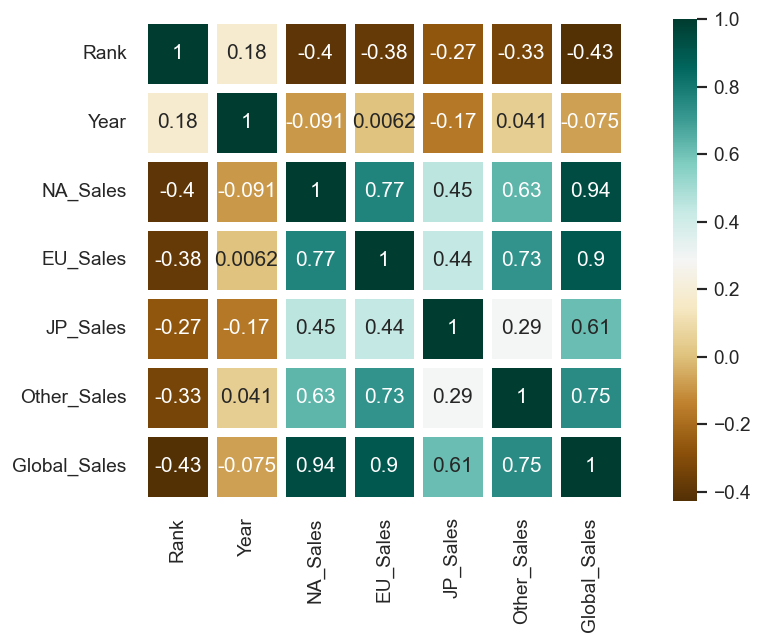

In [9]:
sns.heatmap(vgsales.corr(), annot=True, cmap="BrBG", square=True, linewidths=5)

# Regional classified dataset

In [ ]:
vgsales1 = vgsales.copy()
na_df = vgsales1[['Name','Platform','Year','Genre','Publisher','NA_Sales']]
eu_df = vgsales1[['Name','Platform','Year','Genre','Publisher','EU_Sales']]
gb_df = vgsales1[['Name','Platform','Year','Genre','Publisher','Global_Sales']]
o_df = vgsales1[['Name','Platform','Year','Genre','Publisher','Other_Sales']]
jp_df = vgsales1[['Name','Platform','Year','Genre','Publisher','JP_Sales']]

na_df['region'] = 'NA'
eu_df['region'] = 'EU'
gb_df['region'] = 'Global'
jp_df['region'] = 'JP'
o_df['region'] = 'Other'

na_df = na_df.rename(columns={'NA_Sales':'Sales'})
eu_df = eu_df.rename(columns={'EU_Sales':'Sales'})
jp_df = jp_df.rename(columns={'JP_Sales':'Sales'})
o_df = o_df.rename(columns={'Other_Sales':'Sales'})
gb_df = gb_df.rename(columns={'Global_Sales':'Sales'})

rs_df = pd.concat([na_df,eu_df,gb_df,jp_df,o_df])
rs_df_noglobal = pd.concat([na_df,eu_df,jp_df,o_df])

# 5 year average dataframes

## 5 year average genre count

In [928]:
datetime_df = vgsales.copy()
datetime_df = datetime_df[(1980<vgsales["Year"]) & (2016>datetime_df["Year"])].sort_values(by='Year')
def to_year(x):
    return dt.datetime(x,1,1)
datetime_df.Year = datetime_df.Year.apply(to_year)
adfgenre1 = datetime_df[['Year','Genre','Rank']].groupby(['Year','Genre']).count()
adfgenre1 = adfgenre1.unstack()
adfgenre1 = adfgenre1.resample('5AS').sum()/5

#renaming index
adfgenre1 = adfgenre1.rename(index={dt.datetime(1981,1,1): '1981-1985',
                 dt.datetime(1986,1,1): '1986-1990',
                 dt.datetime(1991,1,1): '1991-1995',
                 dt.datetime(1996,1,1): '1996-2000',
                 dt.datetime(2001,1,1): '2001-2005',
                 dt.datetime(2006,1,1): '2006-2010',
                 dt.datetime(2011,1,1): '2011-2015'})

adfgenre1 = adfgenre1.Rank

# gcount_1980 = vgsales[['Year','Genre','Rank']][1980==vgsales["Year"]].groupby(['Year','Genre']).count()
# gcount_2016 = vgsales[['Year','Genre','Rank']][2016==vgsales["Year"]].groupby(['Year','Genre']).count()
adfgenre1.loc['1980'] = [1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0]
adfgenre1.loc['2016'] = [118.0,33.0,14.0,18.0,10.0,0.0,20.0,40.0,32.0,9.0,38.0,10.0]
adfgenre1 = adfgenre1.reindex(['1980', '1981-1985', '1986-1990', '1991-1995','1996-2000','2001-2005','2006-2010','2011-2015','2016'])
adfgenre1

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Year,,,,,,,,,,,,
1980,1.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
1981-1985,10.6,0.2,0.2,0.6,3.6,2.6,1.2,0.0,4.0,0.4,2.0,0.0
1986-1990,3.0,0.2,0.4,0.2,3.6,1.6,0.8,2.2,1.6,0.4,3.0,0.0
1991-1995,4.8,4.8,14.0,6.8,9.4,5.4,5.0,12.0,9.6,5.0,14.2,5.8
1996-2000,35.8,17.8,30.4,20.4,19.8,10.8,39.8,27.8,21.8,15.0,62.2,22.0
2001-2005,130.6,31.0,39.6,60.2,71.2,20.2,86.2,55.0,74.4,29.4,127.4,28.0
2006-2010,222.8,123.2,51.0,175.8,43.6,59.4,76.8,106.2,81.8,94.0,175.0,55.4
2011-2015,218.6,71.0,28.6,68.8,21.8,14.0,31.2,82.4,56.4,23.4,69.2,20.8
2016,118.0,33.0,14.0,18.0,10.0,0.0,20.0,40.0,32.0,9.0,38.0,10.0


## 5 year average platform count

In [943]:
datetime_df = vgsales.copy()
datetime_df = datetime_df[(1980<vgsales["Year"]) & (2016>datetime_df["Year"])].sort_values(by='Year')
def to_year(x):
    return dt.datetime(x,1,1)
datetime_df.Year = datetime_df.Year.apply(to_year)
adfplatform = datetime_df[['Year','Platform','Rank']].groupby(['Year','Platform']).count()
adfplatform = adfplatform.unstack()
adfplatform = adfplatform.resample('5AS').sum()/5
adfplatform = adfplatform.rename(index={dt.datetime(1981,1,1): '1981-1985',
                 dt.datetime(1986,1,1): '1986-1990',
                 dt.datetime(1991,1,1): '1991-1995',
                 dt.datetime(1996,1,1): '1996-2000',
                 dt.datetime(2001,1,1): '2001-2005',
                 dt.datetime(2006,1,1): '2006-2010',
                 dt.datetime(2011,1,1): '2011-2015'})

adfplatform = adfplatform.Rank

adfplatform
# l_1980 = []
# adfgenre1.loc['1980'] = l_1980

pcount_1980 = vgsales[['Year','Platform','Rank']][1980==vgsales["Year"]].groupby(['Year','Platform']).count()
pcount_2016 = vgsales[['Year','Platform','Rank']][2016==vgsales["Year"]].groupby(['Year','Platform']).count()
pcount_2016

Rank
Year Platform      
2016 3DS         35
     PC          38
     PS3         32
     PS4        107
     PSV         58
     WiiU        10
     X360         8
     XOne        54

In [995]:
sales_1980 = vgsales[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']][1980==vgsales["Year"]].groupby('Year').sum()
sales_2016 = vgsales[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']][2016==vgsales["Year"]].groupby('Year').sum()
df_81to15 = vgsales[(1980<vgsales["Year"]) & (2016>vgsales["Year"])].sort_values(by='Year')

def to_year(x):
    return dt.datetime(x,1,1)

df_81to15.Year = df_81to15.Year.apply(to_year)
df_81to15 = df_81to15.set_index('Year')
del df_81to15['Rank']
del df_81to15['Name']

#we take average of 5 years between 1981-2015
salesavg_81to15 = df_81to15[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].resample('5AS').sum()/5

salesavg_81to15.loc['1980'] = sales_1980.iloc[0]
salesavg_81to15.loc['2016'] = sales_2016.iloc[0]

salesavg_81to15 = salesavg_81to15.rename(index={dt.datetime(1981,1,1): '1981-1985',
                 dt.datetime(1986,1,1): '1986-1990',
                 dt.datetime(1991,1,1): '1991-1995',
                 dt.datetime(1996,1,1): '1996-2000',
                 dt.datetime(2001,1,1): '2001-2005',
                 dt.datetime(2006,1,1): '2006-2010',
                 dt.datetime(2011,1,1): '2011-2015'})
sales_5ysavg = salesavg_81to15.reindex(['1980', '1981-1985', '1986-1990', '1991-1995','1996-2000','2001-2005','2006-2010','2011-2015','2016'])
sales_5ysavg



,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.590,0.670,0.000,0.120,11.380
1981-1985,27.018,2.250,7.386,0.478,37.144
1986-1990,23.088,5.382,16.088,1.204,45.774
1991-1995,22.944,10.018,29.752,1.624,64.330
1996-2000,106.084,55.580,50.292,9.904,221.886
2001-2005,208.828,107.184,42.350,32.768,391.472
2006-2010,313.766,168.396,63.132,69.814,615.490
2011-2015,157.098,127.042,45.110,40.412,369.774
2016,22.660,26.760,13.670,7.750,70.900


In [961]:
#40C9FF',
       "Adventure": '#55B4FF',
       "Puzzle":'#6A9EFF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#9473FF',
       "Misc": '#A95EFF',
       "Platform": '#B453FF',
       "Role-Playing":'#BE48FF',
       "Shooter":'#D332FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
        
['#55B4FF','#6A9EFF','#7594FF'.'#7F89FF','#A95EFF','#B453FF','#BE48FF','#D332FF','#E81CFF']

Index(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], dtype='object')

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_32226/1507150653.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(y=[np.repeat(i, 9)], x=df_make.values, s=100,c=['#FFFFFF','#ECE0FF','#D9C0FF','#C6A0FF','#B380FF','#A060FF','#8D40FF','#7A20FF','#6600FF'])
/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_32226/1507150653.py:7: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  ax.scatter(y=[np.repeat(i, 9)], x=df_make.values, s=100,c=['#FFFFFF','#ECE0FF','#D9C0FF','#C6A0FF','#B380FF','#A060FF','#8D40FF','#7A20FF','#6600FF'])
/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_32226/1507150653.py:7: MatplotlibDeprecationWarning: Support for passing numbers throug

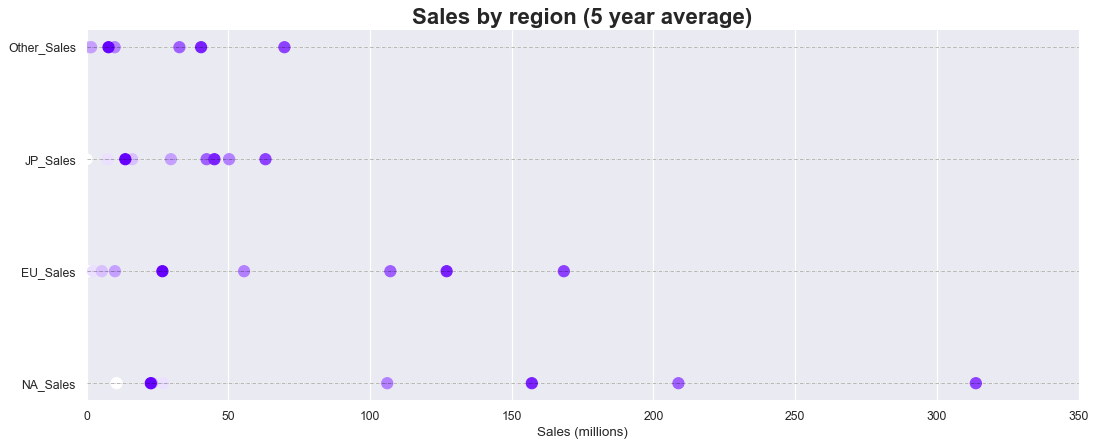

In [1001]:
fig, ax = plt.subplots(figsize=(16,6), dpi= 80)
ax.hlines(y=sales_5ysavg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns, xmin=0, xmax=350, color='black', alpha=0.5, linewidth=.5, linestyles='dashdot')

# Draw the Dots
for i, make in enumerate(sales_5ysavg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns):
    df_make = sales_5ysavg[make]
    ax.scatter(y=[np.repeat(i, 9)], x=df_make.values, s=100,c=['#FFFFFF','#ECE0FF','#D9C0FF','#C6A0FF','#B380FF','#A060FF','#8D40FF','#7A20FF','#6600FF'])
    # ax.scatter(y=i, x='cty', data=df_median.loc[df_median.index==make, :], s=75, c='firebrick')
    
ax.set_title('Sales by region (5 year average)', fontdict={'size':20},fontweight = 'bold')
ax.set_xlabel('Sales (millions)')
ax.set_yticklabels(sales_5ysavg[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].columns, fontdict={'horizontalalignment': 'right'})
ax.set_xlim(0, 350)
# ax.set_facecolor("#FBEAEB")
plt.gca().spines["top"].set_visible(False)    
plt.gca().spines["bottom"].set_visible(False)    
plt.gca().spines["right"].set_visible(False)    
plt.gca().spines["left"].set_visible(False)   
plt.show()

## Distribution of video games published by year

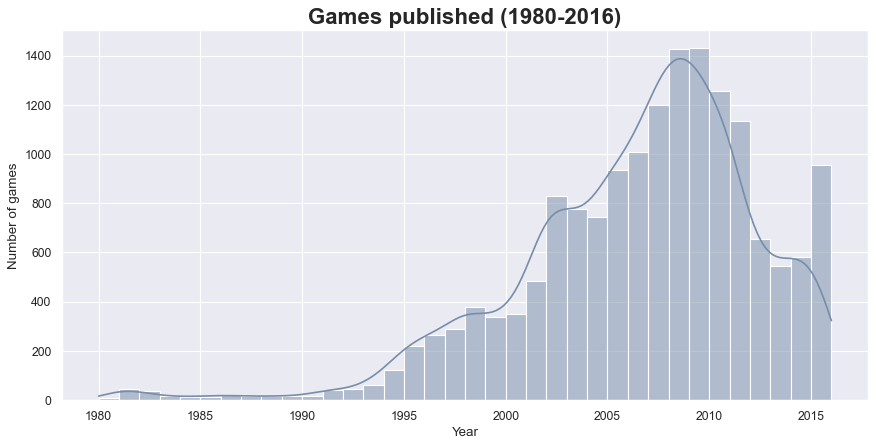

In [712]:
sns.histplot(vgsales.Year, binwidth=1,kde=True, color='#778DA9')
plt.title('Games published (1980-2016)', fontdict={'size':20},fontweight = 'bold')
plt.ylabel('Number of games')
plt.show()

## Publishers with Highest Global Revenue (1980-2015)

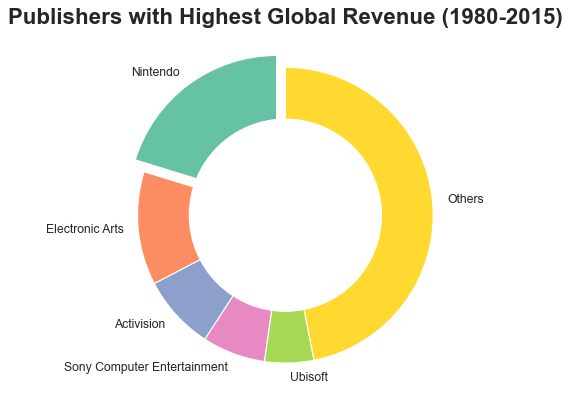

In [304]:
#Prepare top5_jp dataset
region = 'Global_Sales'
top5 = vgsales[['Publisher',region]]
others = (top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[5:].Global_Sales.sum())
top5 = top5.groupby('Publisher').sum().sort_values(by=region, ascending=False)[:5]
top5.loc['Others'] = others
top5_arr = np.reshape(top5.values,-1)
top1_share = f'{round(top5_arr[0] / top5_arr.sum() * 100,1)}%'

plt.pie(
    top5_arr,
    labels = top5.index,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set2'),
    explode = [0.1,0,0,0,0,0],
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')

plt.gcf().gca().add_artist(hole)

plt.title('Publishers with Highest Global Revenue (1980-2015)',fontdict={'size':20},fontweight = 'bold')
plt.show()

## Most popular genres by total sales

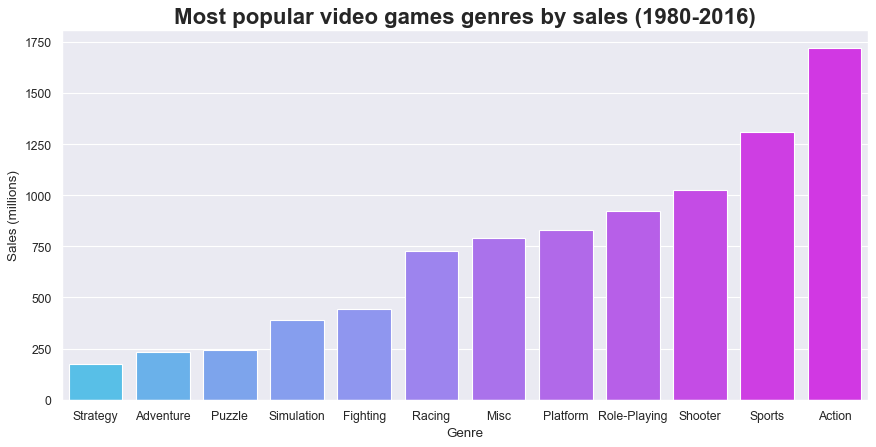

In [728]:
genre_gsales = vgsales[['Genre','Global_Sales']]
genre_gsales = genre_gsales.groupby('Genre').sum().sort_values(by='Global_Sales')
#clrs = ['#A6B1E1' if (x > 1600) else '#778DA9' for x in np.array(genre_gsales.Global_Sales) ]
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#55B4FF',
       "Puzzle":'#6A9EFF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#9473FF',
       "Misc": '#A95EFF',
       "Platform": '#B453FF',
       "Role-Playing":'#BE48FF',
       "Shooter":'#D332FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
sns.barplot(data = genre_gsales, x = genre_gsales.index, y ='Global_Sales',palette=clrs)
sns.set(rc={"figure.dpi":80,"figure.figsize":(13,6)})
plt.title('Most popular video games genres by sales (1980-2016)',fontdict={'size':20},fontweight = 'bold')
plt.ylabel('Sales (millions)')
plt.show()

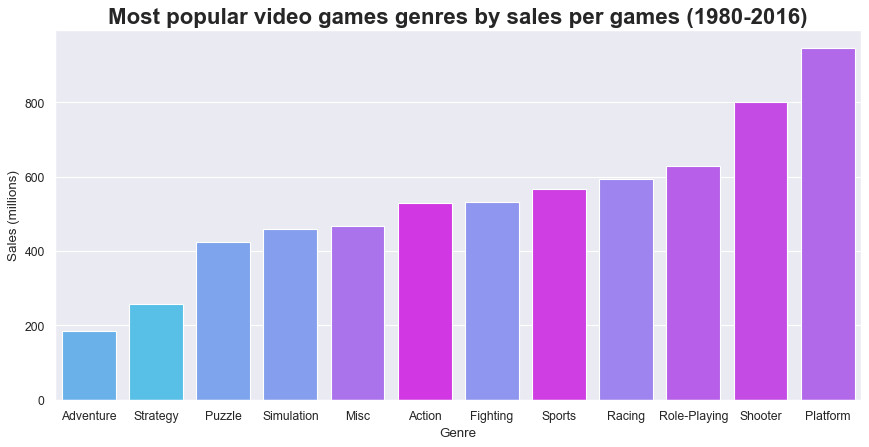

In [729]:
region = 'Global_Sales'
genre_gsales = vgsales[['Genre',region]]
genre_gsales = genre_gsales.groupby('Genre').agg({'Global_Sales': ['sum','count']})
genre_gsales['sales_per_game']=round((genre_gsales.Global_Sales.iloc[:,0]/genre_gsales.Global_Sales.iloc[:,1])*1000,1)
genre_gsales.sort_values(('Global_Sales','sum'))
genre_gsales = genre_gsales.sort_values('sales_per_game')
#clrs = ['#A6B1E1' if (x > 900) else '#778DA9' for x in np.array(genre_gsales.sales_per_game) ]
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#55B4FF',
       "Puzzle":'#6A9EFF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#9473FF',
       "Misc": '#A95EFF',
       "Platform": '#B453FF',
       "Role-Playing":'#BE48FF',
       "Shooter":'#D332FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}

ax = sns.barplot(data = genre_gsales, x = genre_gsales.index, y ='sales_per_game', palette=clrs)
sns.set(rc={"figure.dpi":80,"figure.figsize":(13,6)})
ax.set_title('Most popular video games genres by sales per games (1980-2016)',fontdict={'size':20},fontweight = 'bold')
ax.set_ylabel('Sales (millions)')
plt.show()

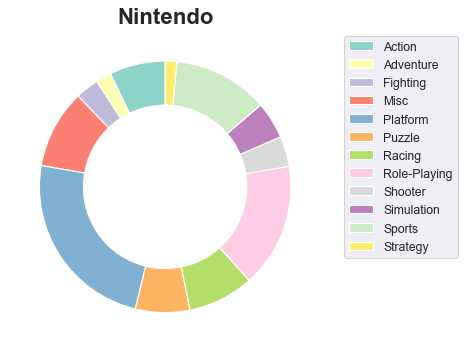

In [83]:
publisher='Nintendo'
g_share = vgsales[vgsales['Publisher']==publisher][['Genre','Global_Sales']].groupby('Genre').sum()

plt.figure(figsize=(6,6), dpi=80)
plt.pie(
    g_share.Global_Sales,
    shadow = False,     
    startangle = 90,
    colors=sns.color_palette('Set3'),
    )

hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.legend(labels=g_share.index,bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.tight_layout()

plt.title('Nintendo',fontdict={'size':20},fontweight = 'bold')
plt.show()

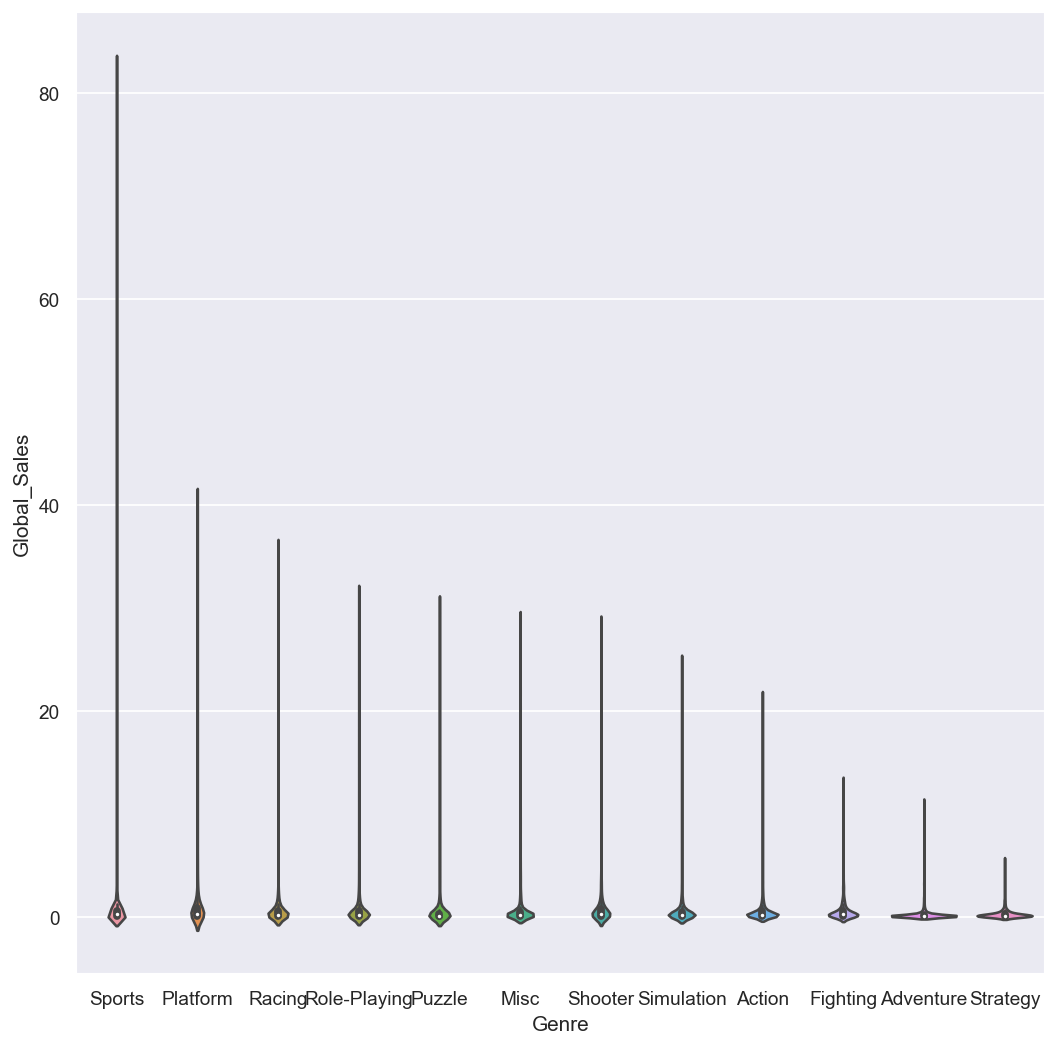

In [1000]:
sns.violinplot(x = 'Genre', y = "Global_Sales", data = vgsales)
sns.set(rc = {"figure.figsize":(10,10)})

## Sales from 1980-2016

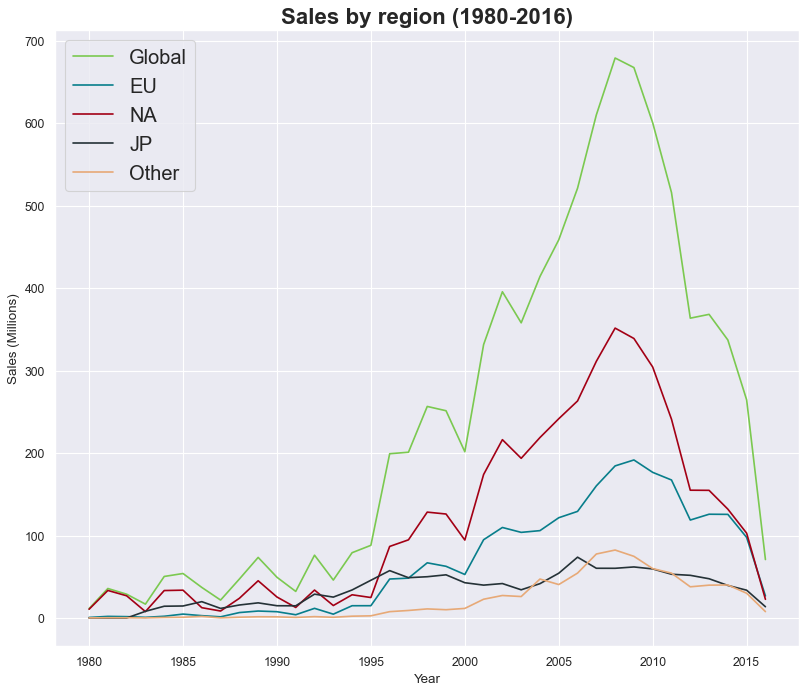

In [726]:
sales_na = vgsales[['Year','NA_Sales']].groupby("Year").sum()
sales_jp = vgsales[['Year','JP_Sales']].groupby("Year").sum()
sales_eu = vgsales[['Year','EU_Sales']].groupby("Year").sum()
sales_global = vgsales[['Year','Global_Sales']].groupby("Year").sum()
sales_others = vgsales[['Year','Other_Sales']].groupby("Year").sum()
years = sales_global.index
regions = ['Global','EU','NA','JP','Other']
c1,c2,c3,c4,c5 = '#7BC950','#087E8B','#A30015','#253237','#E7A977'
plt.figure(figsize=(12,10))
ax = sns.lineplot(x=years, y=sales_global.Global_Sales, color=c1)
ax = sns.lineplot(x=years, y=sales_eu.EU_Sales, color=c2)
ax = sns.lineplot(x=years, y=sales_na.NA_Sales, color=c3)
ax = sns.lineplot(x=years, y=sales_jp.JP_Sales, color=c4)
ax = sns.lineplot(x=years, y=sales_others.Other_Sales, color=c5)
ax.set_ylabel(ylabel='Sales (Millions)')
ax.set_title('Sales by region (1980-2016)', fontsize=20,fontweight='bold')
ax.legend(handles=ax.lines[::], labels=regions, fontsize=18)
plt.show();

## Top Sales games (1980-2016)

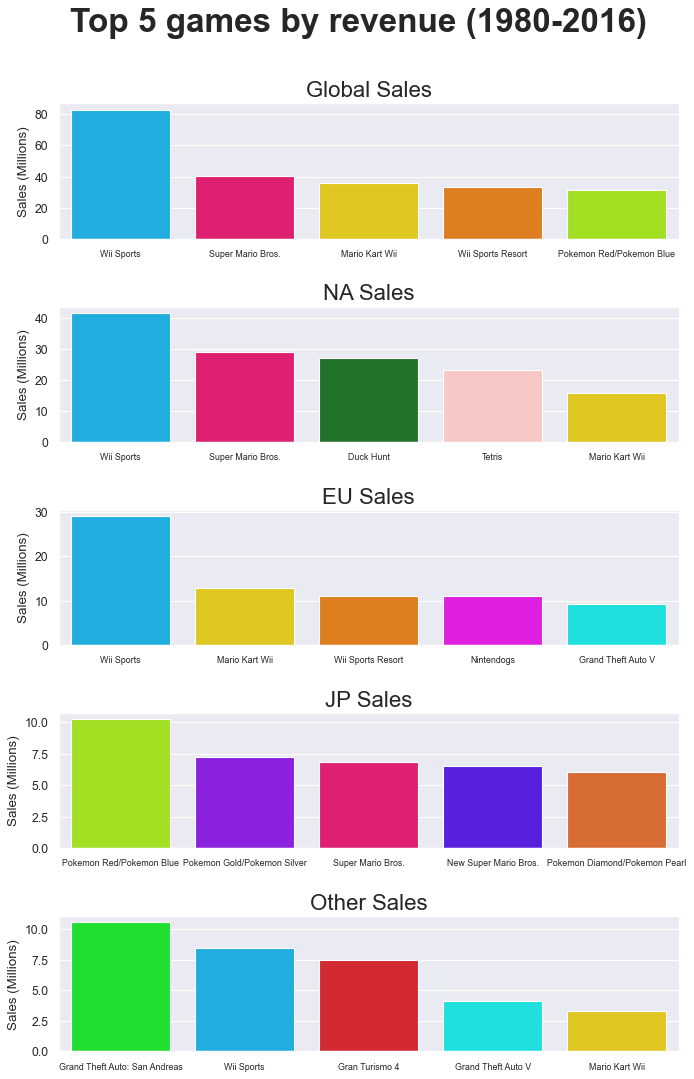

In [727]:
#DataFrames
ggame_sales = vgsales[['Name','Global_Sales']].nlargest(5,'Global_Sales')
nagame_sales = vgsales[['Name','NA_Sales']].nlargest(5,'NA_Sales')
jpgame_sales = vgsales[['Name','JP_Sales']].nlargest(5,'JP_Sales')
eugame_sales = vgsales[['Name','EU_Sales']].nlargest(5,'EU_Sales')
ogame_sales = vgsales[['Name','Other_Sales']].nlargest(5,'Other_Sales')
colors =  {'Wii Sports':'#01befe', 
        'Mario Kart Wii':"#ffdd00", 
        'Wii Sports Resort':"#ff7d00", 
        'Super Mario Bros.':"#ff006d", 
        'Pokemon Red/Pokemon Blue':"#adff02", 
        'Pokemon Gold/Pokemon Silver':'#8f00ff',
        'New Super Mario Bros.':'#4900ff',
        'Pokemon Diamond/Pokemon Pearl':'#F26419',
        'Duck Hunt':'#157F1F',
        'Tetris':'#FFC0BE',
        'Nintendogs':'#ff00ff',
        'Grand Theft Auto V':'#00ffff',
        'Grand Theft Auto: San Andreas':'#00ff15',
        'Gran Turismo 4':'#f00c18',}
#Fig config 
fig = plt.figure(figsize=(10,15), dpi=80)
fig.tight_layout(pad=5)
plt.subplots_adjust(top=0.90,hspace=0.5)
plt.suptitle('Top 5 games by revenue (1980-2016)', size=30,fontweight = 'bold')


#add subplots
ax1 = fig.add_subplot(511)
ax1 = sns.barplot(data=ggame_sales,x='Name',y='Global_Sales', palette=colors)
ax1.set_title('Global Sales', size=20)
ax1.set_xlabel('')
ax1.axes.get_xaxis()
ax1.set_xticklabels(labels = ggame_sales.Name, size=8)
ax1.set_ylabel(ylabel='Sales (Millions)')


ax2 = fig.add_subplot(512)
ax2 = sns.barplot(data=nagame_sales,x='Name',y='NA_Sales',palette=colors)
ax2.set_xlabel('')
ax2.set_xticklabels(labels = nagame_sales.Name, size=8)
ax2.set_title('NA Sales', size=20)
ax2.set_ylabel(ylabel='Sales (Millions)')

ax3 = fig.add_subplot(513)
ax3 = sns.barplot(data=eugame_sales,x='Name',y='EU_Sales',palette=colors)
ax3.set_xlabel('')
ax3.set_xticklabels(labels = eugame_sales.Name, size=8)
ax3.set_title('EU Sales', size=20)
ax3.set_ylabel(ylabel='Sales (Millions)')

ax4 = fig.add_subplot(514)
ax4 = sns.barplot(data=jpgame_sales,x='Name',y='JP_Sales',palette=colors)
ax4.set_xlabel('')
ax4.set_xticklabels(labels = jpgame_sales.Name, size=8)
ax4.set_title('JP Sales', size=20)
ax4.set_ylabel(ylabel='Sales (Millions)')

ax5 = fig.add_subplot(515)
ax5 = sns.barplot(data=ogame_sales,x='Name',y='Other_Sales',palette=colors)
ax5.set_xlabel('')
ax5.set_xticklabels(labels = ogame_sales.Name, size=8)
ax5.set_title('Other Sales', size=20)
ax5.set_ylabel(ylabel='Sales (Millions)')

plt.show()

## Top 5 most popular platform in each regions (by sales, 1980-2016)

In [ ]:
platform_sales = vgsales[['Platform','Global_Sales','JP_Sales','EU_Sales','NA_Sales','Other_Sales']].groupby('Platform').sum()

platform_sales

g_sales = platform_sales.nlargest(5,'Global_Sales')
na_sales = platform_sales.nlargest(5,'NA_Sales')
eu_sales = platform_sales.nlargest(5,'EU_Sales')
jp_sales = platform_sales.nlargest(5,'JP_Sales')
other_sales = platform_sales.nlargest(5,'Others_Sales')


## Trend of platform usage by count (1980-2016)

In [782]:
df_platform = vgsales['Platform'].unique()
platform_count = vgsales[['Platform','Year','Rank']].groupby(['Platform','Year']).count()
platform_count = platform_count.rename({'Rank':'Count'},axis='columns')

curr_platform = platform_count.loc[platform_count.index.get_level_values(0)=='DS', :]
curr_platform


Count
Platform Year       
DS       1985      1
         2004     23
         2005    118
         2006    202
         2007    377
         2008    492
         2009    405
         2010    326
         2011    153
         2012     23
         2013      9
         2014      1

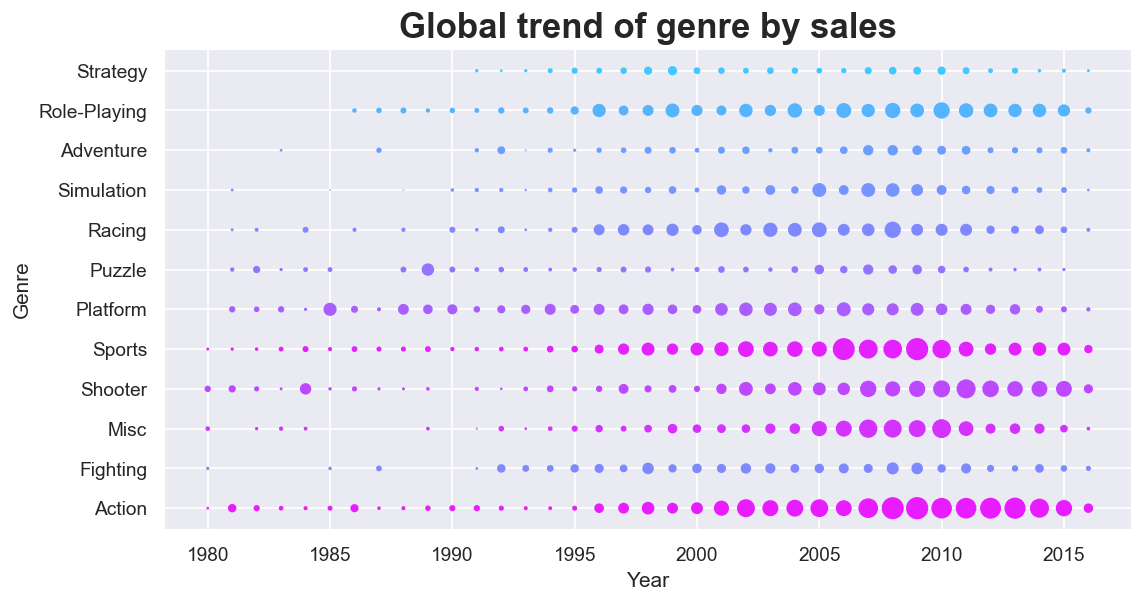

In [127]:
region = 'Global_Sales'
genre_trend = vgsales[['Year','Genre',region]].groupby(['Year','Genre']).sum()
genre_trend.unstack()
genre_trend = genre_trend.reset_index() 

#coloring
clrs = {"Strategy": '#40C9FF',
       "Adventure": '#6A9EFF',
       "Puzzle":'#9473FF',
       "Simulation":'#7594FF',
       "Fighting":'#7F89FF',
       "Racing":'#7F89FF',
       "Misc": '#D332FF',
       "Platform": '#A95EFF',
       "Role-Playing":'#55B4FF',
       "Shooter":'#BE48FF',
       "Sports":'#E322FF',
       "Action":'#E81CFF'}
def coloring(x):
    return clrs[x]
genre_trend['clrs'] = genre_trend['Genre'].apply(coloring)

    
genre_trend.plot.scatter(x='Year',y='Genre',s=genre_trend['Global_Sales'],c=genre_trend['clrs'])
plt.title('Global trend of genre by sales',fontsize=20,fontweight='bold')
plt.show()

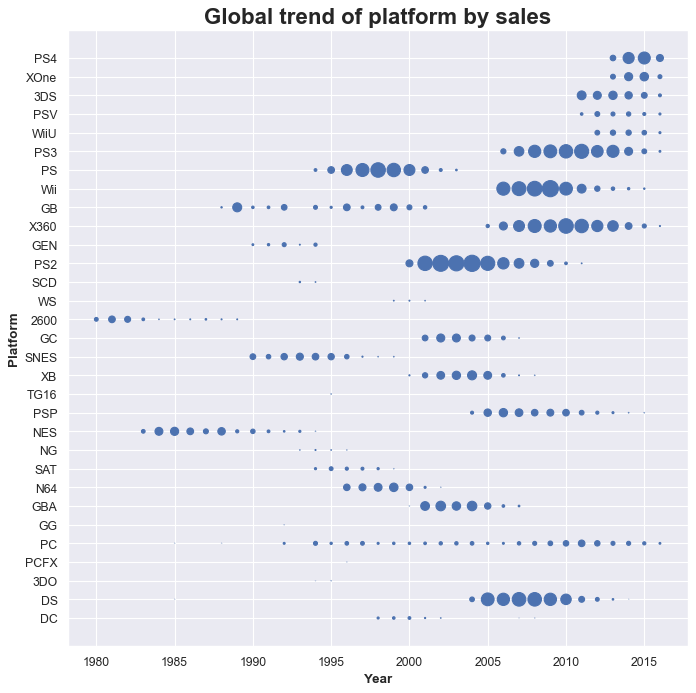

In [175]:
region = 'Global_Sales'
platform_trend = vgsales[['Year','Platform',region]].groupby(['Year','Platform']).sum()
platform_trend.unstack()
platform_trend = platform_trend.reset_index() 
platform_trend = platform_trend.sort_values(by='Global_Sales',ascending=True)


fig = plt.figure(figsize=(10,10), dpi=80)
plt.scatter(data = platform_trend,x='Year',y='Platform',s=platform_trend[region])
plt.title('Global trend of platform by sales',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontweight='bold')
plt.ylabel('Platform', fontweight='bold')
plt.show()

In [201]:
top20_publisher = vgsales.groupby('Publisher').sum().sort_values(by='Global_Sales',ascending=False).iloc[:20]
top20_publisher_df = rs_df_noglobal[rs_df_noglobal['Publisher'].isin(top20_publisher.index.values)]


In [208]:
top20_publisher_df[top20_publisher_df['Publisher']=='Nintendo'].Sales.count()

2784